### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [27]:
origin_df = pd.read_csv('/Users/asmitakulkarni/Downloads/The E-commerce Dataset.csv')
origin_df

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [28]:
print('the length before removing missing data is' , len(origin_df))

the length before removing missing data is 20000


In [29]:
# Creating a copy of the original DataFrame
clean_df_occ = origin_df

# Initializing a count variable to count occurrences of reviews with 'none'
count = 0

# Iterating through each row in the DataFrame
for index, row in clean_df_occ.iterrows():
    # Checking if the review is 'none'
    if row['review'] == 'none':
        count += 1  # Incrementing count if review is 'none'

print('Count of "none" data is ',(count))

# Dropping rows where the review is 'none'
clean_df_occ = clean_df_occ.drop(clean_df_occ[clean_df_occ['review'] == 'none'].index)

Count of "none" data is  18


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [30]:
#Q2.1

# Getting unique user IDs from the 'userId' column in the clean_df DataFrame
user_array = clean_df['userId'].unique()

# Printing the number of unique users by determining the size of the user_array
print('the number of unique users is', user_array.size)

# Getting unique reviews from the 'review' column in the clean_df DataFrame
occupation_array = clean_df['review'].unique()

# Printing the number of unique reviews by determining the size of the occupation_array
print('the number of unique reviews is', occupation_array.size)

# Getting unique items from the 'item' column in the clean_df DataFrame
movie_array = clean_df['item'].unique()

# Printing the number of unique items by determining the size of the movie_array
print('the number of unique items is', movie_array.size)

# Getting unique categories from the 'category' column in the clean_df DataFrame
genre_array = clean_df['category'].unique()

# Printing the number of unique categories by determining the size of the genre_array
print('the number of unique categories is', genre_array.size)

the number of unique users is 8562
the number of unique reviews is 19459
the number of unique items is 89
the number of unique categories is 9


In [31]:
#Q2.2
clean_df['rating'].describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [32]:
#Q2.3
# Group users by their genders and then count the number of items rated by each gender
gender_item_num = clean_df.groupby(['gender'])['item'].count().reset_index(name='count')
gender_item_num.head()

,gender,count
0,F,9793
1,M,10123


In [33]:
gender_item_num['count'].describe()

count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: count, dtype: float64

In [34]:
#Q2.4
# Group items by their names and then count the number of users rated the item
rated_item_num = clean_df.groupby(['item'])['rating'].count().reset_index(name='count')
rated_item_num.head()

,item,count
0,AOL (America Online),939
1,All Advantage,657
2,Alta Vista (by 1stUp),157
3,Amazon.com,240
4,American Airlines,185


In [35]:
rated_item_num['count'].describe()

count     89.000000
mean     223.775281
std      116.418988
min      139.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      939.000000
Name: count, dtype: float64

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

(array([1, 2]), [Text(1, 0, 'F'), Text(2, 0, 'M')])

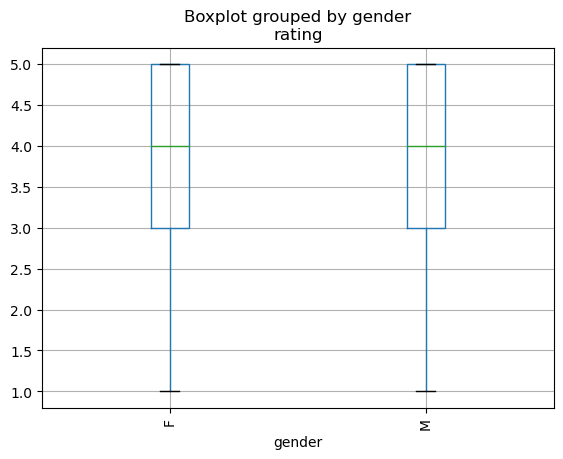

In [36]:
# gender-rating correlation
clean_df.boxplot("rating", by="gender")
plt.xticks(rotation=90)

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, '0.0'),
  Text(2, 0, '1.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '3.0'),
  Text(5, 0, '4.0')])

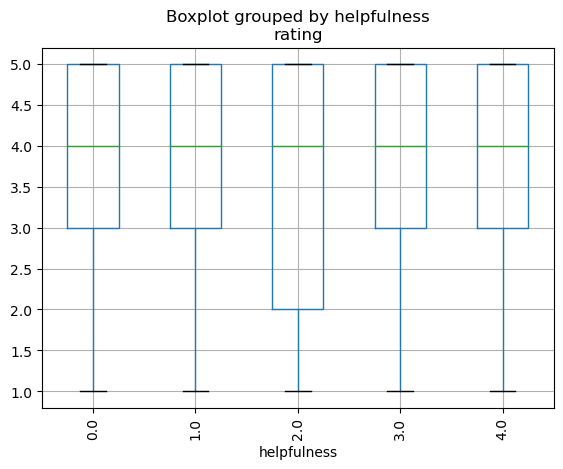

In [37]:
# helpfulness rating corrrelation
clean_df.boxplot("rating", by="helpfulness")
plt.xticks(rotation=90)

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [38]:
#the reviews of which the helpfulness is no more than 2
remove_outlier_df = clean_df.drop(clean_df.index[(clean_df['helpfulness'] <= 2)])
print("the length of data after removing outlier helpfulness:", len(remove_outlier_df))

the length of data after removing outlier helpfulness: 13643


In [39]:
# group users by their ids and count the number of their ratings
group_user_df = remove_outlier_df.groupby(['userId'])['rating'].count().reset_index(name='count')
print("The number of users after removing outlier helpfulness:", len(group_user_df))

The number of users after removing outlier helpfulness: 6535


In [46]:
group_user_df.head()

,userId,count
0,0,3
1,1,1
2,2,2
3,3,2
4,4,7


In [ ]:
group_user_df = remove_outlier_df.groupby('userId')['rating'].count().reset_index(name='count')

In [47]:
# Finding the number of users who have rated less than 7 items
outlier_users_less_than_7 = group_user_df[group_user_df['count'] < 7]
print("The number of users who have rated less than 7 items:", len(outlier_users_less_than_7))

The number of users who have rated less than 7 items: 6268


In [48]:
# Remove users who rate less than 7 items
remove_outlier_df = remove_outlier_df[~remove_outlier_df['userId'].isin(outlier_users_less_than_7['userId'])]
print("The number of users after removing outlier users:", len(remove_outlier_df))

The number of users after removing outlier users: 2741


In [49]:
group_item_df = remove_outlier_df.groupby(['item'])['rating'].count().reset_index(name='count')
print(group_item_df)

                     item  count
0    AOL (America Online)     93
1           All Advantage     72
2   Alta Vista (by 1stUp)     10
3              Amazon.com     18
4       American Airlines     19
..                    ...    ...
84                Wendy's     35
85      What Lies Beneath     28
86                  X-Men     48
87                  X.com     19
88                   eBay     71

[89 rows x 2 columns]


In [50]:
# get the names of items have no less than 11 ratings
items = group_item_df[group_item_df['count'] >= 11] ['item'].tolist()
print(len(items))

82


In [51]:
# filter items that have received less than 11 ratings
remove_outlier_df = remove_outlier_df[remove_outlier_df['item'].isin(items)]
len(remove_outlier_df)

2685

In [52]:
# export the processed data as csv file
remove_outlier_df.to_csv ('A combined dataset from ecommerce dataset_cleaned_data.csv', index=False)